<a href="https://colab.research.google.com/github/SaiSuvamPatnaik/Dwarf-E-Diary/blob/main/Dwarf_E_Diary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import pandas as pd 

### Exploratory Analysis

##### Analysing Training Dataset

In [2]:
train_score = []
train_file_name = []
train_img_matrix = []
train_counts_imgs = []
train_folder = []

for filename in os.listdir("/content/drive/MyDrive/DSI_Data/train/"):
    train_count = 0
    for x in os.listdir("/content/drive/MyDrive/DSI_Data/train/"+filename):
      train_count+=1
      img = cv2.imread(os.path.join("/content/drive/MyDrive/DSI_Data/train/"+filename,x))
      if img is not None:
          img = cv2.resize(img, (224, 224))
          train_score.append(float(filename))
          train_file_name.append(x)
          train_img_matrix.append(img)
    train_counts_imgs.append(train_count-1)
    train_folder.append(filename)

    print(filename,":",train_count-1)  

2.5 : 50
2.75 : 77
2.25 : 18
2 : 3


In [3]:
train_data = {'Score': train_score, 'Filename': train_file_name, 'Image':train_img_matrix}  
train_Datas = pd.DataFrame(train_data)

In [4]:
train_data1 = {'BCS_Score': train_folder,'Count_of_Images': train_counts_imgs}  
train_Datas1 = pd.DataFrame(train_data1)
train_Datas1

,BCS_Score,Count_of_Images
0,2.5,50
1,2.75,77
2,2.25,18
3,2,3


In [5]:
train_Datas.head()

,Score,Filename,Image
0,2.5,bckk1_1786.jpg,"[[[152, 122, 95], [150, 121, 94], [150, 124, 9..."
1,2.5,bckk1_1788.jpg,"[[[112, 110, 86], [85, 83, 59], [75, 74, 50], ..."
2,2.5,bckk1_1794.jpg,"[[[111, 105, 92], [111, 105, 92], [111, 105, 9..."
3,2.5,bckk1_1798.jpg,"[[[62, 64, 65], [61, 63, 64], [60, 62, 63], [6..."
4,2.5,bckk1_1799.jpg,"[[[46, 51, 52], [50, 55, 56], [57, 62, 63], [5..."


In [6]:
train_Datas["Score"].unique()

array([2.5 , 2.75, 2.25, 2.  ])

In [7]:
train_Datas["Image"][0].shape

(224, 224, 3)

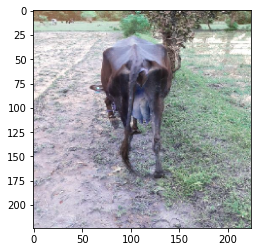

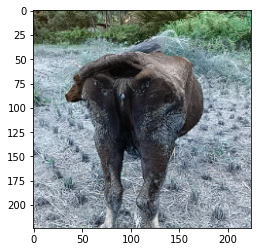

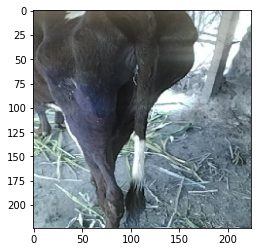

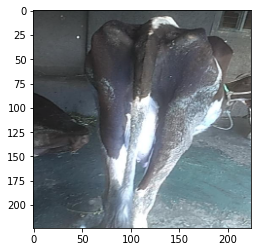

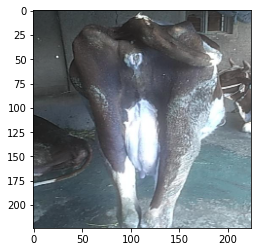

In [8]:
for i in range(5):
  plt.imshow(train_Datas["Image"][i])
  plt.axis('on')
  plt.show()  

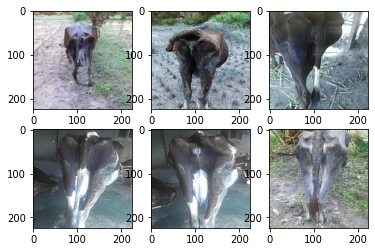

In [41]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(train_Datas["Image"][i], cmap='gray')
plt.show()

##### Analysing Testing Dataset

In [42]:
test_file_name = []
test_img_matrix = []
test_counts_imgs = []
test_folder = []

for filename in os.listdir("/content/drive/MyDrive/DSI_Data/test/"):
    test_count = 0
    for x in os.listdir("/content/drive/MyDrive/DSI_Data/test/"+filename):
      test_count+=1
      img = cv2.imread(os.path.join("/content/drive/MyDrive/DSI_Data/test/"+filename,x))
      if img is not None:
          img = cv2.resize(img, (224, 224))
          test_file_name.append(x)
          test_img_matrix.append(img)
    test_counts_imgs.append(test_count-1)
    test_folder.append(filename)

    print(filename,":",test_count-1)  

Test : 26


In [43]:
test_data = {'Filename': test_file_name, 'Image':test_img_matrix}  
test_Datas = pd.DataFrame(test_data)
test_Datas.head()

,Filename,Image
0,back_0.jpg,"[[[67, 62, 68], [72, 85, 93], [84, 97, 105], [..."
1,back_1.jpg,"[[[39, 30, 26], [38, 33, 31], [29, 24, 21], [3..."
2,back_2.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,back_4.jpg,"[[[248, 208, 170], [85, 62, 51], [145, 120, 10..."
4,back_3.jpg,"[[[39, 30, 26], [38, 33, 31], [29, 24, 21], [3..."


In [44]:
test_data1 = {"Type":["Testing Set"],"Count_of_Images": [test_counts_imgs[0]]}  
test_Datas1 = pd.DataFrame(test_data1)
test_Datas1

,Type,Count_of_Images
0,Testing Set,26


In [45]:
test_Datas.head()

,Filename,Image
0,back_0.jpg,"[[[67, 62, 68], [72, 85, 93], [84, 97, 105], [..."
1,back_1.jpg,"[[[39, 30, 26], [38, 33, 31], [29, 24, 21], [3..."
2,back_2.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,back_4.jpg,"[[[248, 208, 170], [85, 62, 51], [145, 120, 10..."
4,back_3.jpg,"[[[39, 30, 26], [38, 33, 31], [29, 24, 21], [3..."


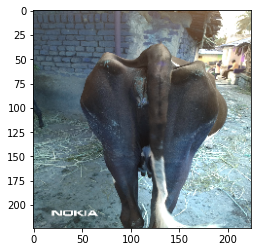

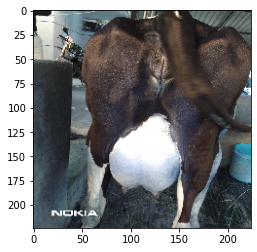

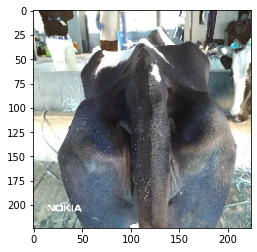

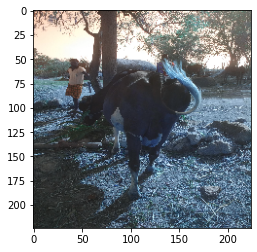

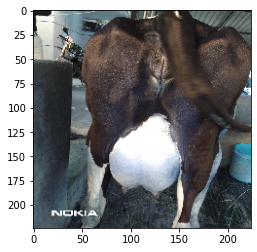

In [46]:
for i in range(5):
  plt.imshow(test_Datas["Image"][i])
  plt.axis('on')
  plt.show()  

## Training

#### Using Fully Connected layers

In [10]:
import torchvision
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

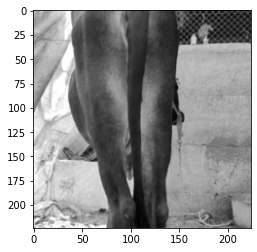

In [11]:
train_path = "/content/drive/MyDrive/DSI_Data/train"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

train_dataset = datasets.ImageFolder(train_path,transform=train_transform)
train_set, val_set = torch.utils.data.random_split(train_dataset, [120, 28])

train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_set, batch_size=14, shuffle=True)


train_batch = next(iter(train_dataloader))
train_images,train_labels = train_batch

plt.imshow(train_images[0][0],cmap="gray")
plt.show()


In [12]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, 1024) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(1024, 512) 
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(512, 512) 
        self.relu = nn.ReLU()
        self.l4 = nn.Linear(512,4)
      
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        out = self.relu(out)
        out = self.l4(out)
        
        return out

model = NeuralNet(3*224*224, 500, 4).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  

correct = 0
total = 0

# Train the model
n_total_steps = len(train_dataloader)
for epoch in range(5):
    # print(epoch)
    for i, (images, labels) in enumerate(train_dataloader):  
        images = images.reshape(-1, 3*224*224).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        correct += (labels==torch.argmax(outputs,1)).sum().item()
        total += labels.size(0)
        
        print(f'Epoch [{epoch+1}/{5}], Step [{i+1}/{n_total_steps}], Accuracy {100 * correct/total}, Loss: {loss.item()/len(train_dataloader):.4f}')


Epoch [1/5], Step [1/4], Accuracy 18.75, Loss: 0.3471
Epoch [1/5], Step [2/4], Accuracy 37.5, Loss: 1.8384
Epoch [1/5], Step [3/4], Accuracy 35.416666666666664, Loss: 20.0279
Epoch [1/5], Step [4/4], Accuracy 35.0, Loss: 5.2961
Epoch [2/5], Step [1/4], Accuracy 39.473684210526315, Loss: 1.3137
Epoch [2/5], Step [2/4], Accuracy 33.69565217391305, Loss: 1.9040
Epoch [2/5], Step [3/4], Accuracy 34.25925925925926, Loss: 2.3115
Epoch [2/5], Step [4/4], Accuracy 34.583333333333336, Loss: 1.3315
Epoch [3/5], Step [1/4], Accuracy 36.76470588235294, Loss: 1.0501
Epoch [3/5], Step [2/4], Accuracy 36.18421052631579, Loss: 0.8162
Epoch [3/5], Step [3/4], Accuracy 37.20238095238095, Loss: 1.1652
Epoch [3/5], Step [4/4], Accuracy 34.72222222222222, Loss: 1.0058
Epoch [4/5], Step [1/4], Accuracy 34.43877551020408, Loss: 0.9178
Epoch [4/5], Step [2/4], Accuracy 34.198113207547166, Loss: 1.1580
Epoch [4/5], Step [3/4], Accuracy 36.18421052631579, Loss: 0.4152
Epoch [4/5], Step [4/4], Accuracy 35.833333

In [13]:
torch.save(model.state_dict(),"Neural_Model.pth")

#### Convolution

Model

In [14]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,8,7,stride=1,padding=3),
            nn.BatchNorm2d(8),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(8,16,3,stride=1,padding=1),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16,32,3,stride=1,padding=1),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32,64,3,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64,128,3,stride=1,padding=1),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2)
        )

        self.linear = nn.Sequential(
            nn.Linear(7*7*128, 1024),
            nn.Linear(1024, 512),
            nn.Linear(512, 4)
        )


    def forward(self, x):
        x = self.features(x)     
        x = x.view(x.size(0),-1)
        out = self.linear(x)
        return out

Values Declaration

In [39]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.006)  

correct = 0
total = 0
n_total_steps = len(train_dataloader)

loss_values = []
accuracy_vals = []
epochs_value = []


Training

In [40]:
for epoch in range(150):
  losses = 0
  acc_vals = 0
    # print(epoch)
  for i, (images, labels) in enumerate(train_dataloader):  
    images = images.to(device)
    labels = labels.to(device)
    
    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    correct += (labels==torch.argmax(outputs,1)).sum().item()
    total += labels.size(0)
    
    print(f'Epoch [{epoch+1}], Step [{i+1}/{n_total_steps}], Accuracy {100 * correct/total}, Loss: {loss.item()/len(train_dataloader):.4f}')

    losses+=loss.item()/len(train_dataloader)
    acc_vals+=100 * correct/total

  loss_values.append(losses/4)
  epochs_value.append(epoch)
  accuracy_vals.append(acc_vals/4)

Epoch [1], Step [1/4], Accuracy 31.25, Loss: 0.3406
Epoch [1], Step [2/4], Accuracy 40.625, Loss: 13.4367
Epoch [1], Step [3/4], Accuracy 37.5, Loss: 135.5609
Epoch [1], Step [4/4], Accuracy 30.833333333333332, Loss: 107.7552
Epoch [2], Step [1/4], Accuracy 28.289473684210527, Loss: 46.5924
Epoch [2], Step [2/4], Accuracy 29.347826086956523, Loss: 17.9765
Epoch [2], Step [3/4], Accuracy 29.62962962962963, Loss: 28.6371
Epoch [2], Step [4/4], Accuracy 28.75, Loss: 23.0919
Epoch [3], Step [1/4], Accuracy 29.044117647058822, Loss: 14.4644
Epoch [3], Step [2/4], Accuracy 31.25, Loss: 16.2198
Epoch [3], Step [3/4], Accuracy 32.73809523809524, Loss: 20.8654
Epoch [3], Step [4/4], Accuracy 33.333333333333336, Loss: 13.6669
Epoch [4], Step [1/4], Accuracy 33.16326530612245, Loss: 8.8913
Epoch [4], Step [2/4], Accuracy 32.783018867924525, Loss: 18.6703
Epoch [4], Step [3/4], Accuracy 33.333333333333336, Loss: 9.0779
Epoch [4], Step [4/4], Accuracy 33.541666666666664, Loss: 12.9926
Epoch [5], St

Training Loss vs No of epochs Curve

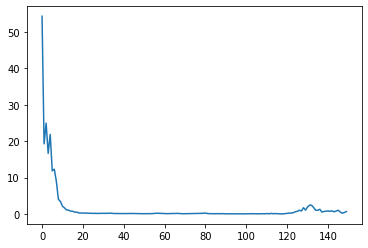

In [17]:
plt.plot(epochs_value, loss_values)

In [20]:
torch.save(model.state_dict(),"Convolution.pth")

Checking Metrics with Validation Set

In [23]:
n_correct = 0
n_samples = 0

y_true = []
y_pred = []

for index,(images, labels) in enumerate(val_dataloader):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    predicted = torch.argmax(outputs, 1)
    
    y_true.append(labels.data.numpy())
    y_pred.append(predicted.data)
    
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the Batch-{index+1} validation images is {acc} %')

Accuracy of the network on the Batch-1 validation images is 64.28571428571429 %
Accuracy of the network on the Batch-2 validation images is 46.42857142857143 %


In [26]:
from sklearn.metrics import confusion_matrix
y_true = np.concatenate((y_true[0], y_true[1]))
y_pred = np.concatenate((y_pred[0], y_pred[1]))


array([[ 0,  0,  0,  0],
       [ 1,  0,  2,  3],
       [ 0,  0,  2,  6],
       [ 0,  1,  2, 11]])

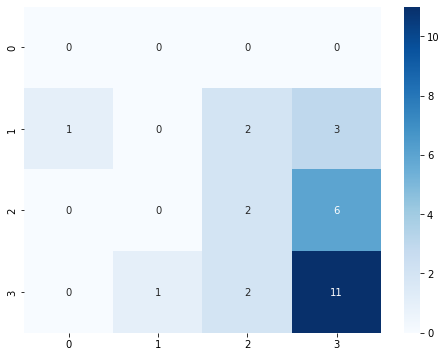

In [47]:
import seaborn as sns
plt.figure(figsize=(8,6))

sns.heatmap(confusion_matrix(y_true,y_pred), annot=True, cmap='Blues')

# Testing

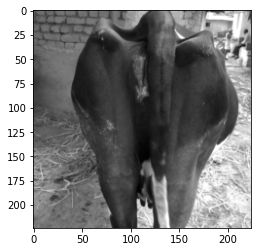

In [27]:
test_transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

test_dataset = datasets.ImageFolder("/content/drive/MyDrive/DSI_Data/test",transform=test_transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1)

test_batch = next(iter(test_dataloader))
test_images,test_labels = test_batch

plt.imshow(test_images[0][0],cmap="gray")
plt.show()


In [28]:
print(len(test_dataloader))

27


In [29]:
for images, labels in test_dataloader:
    print(images)
    images = images.to(device)
    outputs = model(images)
    predicted = torch.argmax(outputs, 1)
    print("Outputs",outputs)
    break
    

tensor([[[[0.4314, 0.4196, 0.3804,  ..., 0.5961, 0.5294, 0.4157],
          [0.4353, 0.4235, 0.3725,  ..., 0.5490, 0.5059, 0.3647],
          [0.4314, 0.4118, 0.3608,  ..., 0.6275, 0.5020, 0.3333],
          ...,
          [0.5608, 0.6039, 0.5294,  ..., 0.8980, 0.8745, 0.7608],
          [0.5098, 0.5176, 0.4706,  ..., 0.8471, 0.9137, 0.8667],
          [0.4941, 0.4706, 0.4745,  ..., 0.8314, 0.8745, 0.8902]],

         [[0.3529, 0.3412, 0.3098,  ..., 0.6353, 0.5765, 0.4824],
          [0.3569, 0.3412, 0.2980,  ..., 0.6078, 0.5804, 0.4510],
          [0.3647, 0.3412, 0.2902,  ..., 0.6902, 0.5961, 0.4392],
          ...,
          [0.5451, 0.5804, 0.5059,  ..., 0.8824, 0.8471, 0.7333],
          [0.4902, 0.4902, 0.4471,  ..., 0.8196, 0.8863, 0.8353],
          [0.4627, 0.4392, 0.4431,  ..., 0.8118, 0.8510, 0.8706]],

         [[0.2863, 0.2745, 0.2471,  ..., 0.7059, 0.6471, 0.5490],
          [0.2941, 0.2784, 0.2392,  ..., 0.6941, 0.6627, 0.5255],
          [0.3020, 0.2784, 0.2353,  ..., 0

/content/drive/MyDrive/DSI_Data/test/Test/back_0.jpg


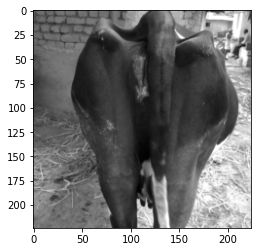

In [30]:
test_transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

test_dataset = datasets.ImageFolder("/content/drive/MyDrive/DSI_Data/test",transform=test_transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1)

test_batch = next(iter(test_dataloader))
test_images,test_labels = test_batch

# print(len(test_dataloader))
# # for i,j in test_dataloader:
  
print(test_dataloader.dataset.samples[0][0])
plt.imshow(test_images[0][0],cmap="gray")
plt.show()

In [31]:
output_test=[]
output_test1=[]

for i,j in test_dataloader:
  output_test.append(i)

for i in test_dataloader.dataset.samples:
  str_concat = ''.join(i[0][42:])
  output_test1.append(str_concat)  

In [32]:
result_data1 = {'Filename': output_test1,'Matrix': output_test}  
result_Datas1 = pd.DataFrame(result_data1)
result_Datas1

,Filename,Matrix
0,back_0.jpg,"[[[tensor([0.4314, 0.4196, 0.3804, 0.4078, 0.4..."
1,back_1.jpg,"[[[tensor([0.7725, 0.7725, 0.7765, 0.7843, 0.8..."
2,back_10.jpg,"[[[tensor([0.5216, 0.5216, 0.4549, 0.3490, 0.3..."
3,back_11.jpg,"[[[tensor([0.0784, 0.0745, 0.0863, 0.0863, 0.0..."
4,back_12.jpg,"[[[tensor([0.5451, 0.4941, 0.6078, 0.6039, 0.5..."
5,back_13.jpg,"[[[tensor([0.7373, 0.7647, 0.8000, 0.7412, 0.5..."
6,back_14.jpg,"[[[tensor([0.2784, 0.2549, 0.2235, 0.1333, 0.2..."
7,back_15.jpg,"[[[tensor([0.7059, 0.6431, 0.5569, 0.4784, 0.5..."
8,back_16.jpg,"[[[tensor([0.8275, 0.7686, 0.8471, 0.7843, 0.8..."
9,back_17.jpg,"[[[tensor([0.3412, 0.2863, 0.2706, 0.3490, 0.3..."


In [33]:
output_index = []
for i in range(len(result_Datas1["Matrix"])):
  outputs = model(result_Datas1["Matrix"][i].to(device))
  predicted = torch.argmax(outputs, 1)
  output_index.append(predicted.item())  

print(output_index)

[3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 1, 2, 2]


In [34]:
mapping_data = {0:2,1:2.25,2:2.5,3:2.75}
for index,val in enumerate(output_index):
  output_index[index]=mapping_data[val]
output_index

[2.75,
 2.75,
 2.5,
 2.75,
 2.75,
 2.75,
 2.5,
 2.75,
 2.25,
 2.5,
 2.75,
 2.75,
 2.5,
 2.75,
 2.5,
 2.75,
 2.75,
 2.5,
 2.75,
 2.75,
 2.75,
 2.5,
 2.75,
 2.5,
 2.25,
 2.5,
 2.5]

In [35]:
result_Datas1["Scores"]=output_index

In [36]:
result_Datas1 = result_Datas1.drop('Matrix', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [37]:
result_Datas1

,Filename,Scores
0,back_0.jpg,2.75
1,back_1.jpg,2.75
2,back_10.jpg,2.50
3,back_11.jpg,2.75
4,back_12.jpg,2.75
5,back_13.jpg,2.75
6,back_14.jpg,2.50
7,back_15.jpg,2.75
8,back_16.jpg,2.25
9,back_17.jpg,2.50


In [38]:
result_Datas1.to_excel("output.xlsx")  